In [76]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 256
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 2
#matplotlib.rcParams['font.family'] = 'sans-serif'
#%matplotlib inline
%matplotlib notebook

In [2]:
import pandas as pd

In [123]:
df = pd.read_csv('test_2dFFT.csv',header=None,delimiter=' ')

In [124]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,"(0.00320637,0)","(0.00318011,-4.29262e-19)","(0.00310261,-9.21702e-19)","(0.0029776,-1.36373e-18)","(0.00281102,-1.81068e-18)","(0.00261045,-2.03255e-18)","(0.00238465,-2.26721e-18)","(0.00214284,-2.78648e-18)","(0.00189413,-2.50624e-18)","(0.00164698,-2.39888e-18)",...,"(0.00164698,5.89036e-18)","(0.00189413,-1.41284e-17)","(0.00214284,-3.92748e-17)","(0.00238465,-1.6348e-18)","(0.00261045,-3.01158e-17)","(0.00281102,-6.23909e-17)","(0.0029776,-1.36976e-17)","(0.00310261,-4.80423e-17)","(0.00318011,6.78451e-18)",NaN
1,"(0.00316706,-4.49805e-19)","(0.00314112,-8.02387e-19)","(0.00306456,-1.26651e-18)","(0.00294109,-1.58048e-18)","(0.00277655,-2.16686e-18)","(0.00257845,-2.71327e-18)","(0.00235541,-2.68834e-18)","(0.00211657,-2.941e-18)","(0.00187091,-2.79956e-18)","(0.00162678,-2.60125e-18)",...,"(0.00162678,-1.16038e-17)","(0.00187091,-3.41172e-17)","(0.00211657,-6.15056e-17)","(0.00235541,-2.69252e-17)","(0.00257845,-5.73304e-17)","(0.00277655,-9.17222e-17)","(0.00294109,-4.56205e-17)","(0.00306456,-8.06633e-17)","(0.00314112,-2.72671e-17)",NaN
2,"(0.00305199,-9.1526e-19)","(0.00302699,-1.23238e-18)","(0.00295321,-1.74227e-18)","(0.00283423,-2.08444e-18)","(0.00267567,-2.53356e-18)","(0.00248476,-2.83226e-18)","(0.00226983,-2.87177e-18)","(0.00203966,-3.00956e-18)","(0.00180293,-2.88267e-18)","(0.00156768,-8.24208e-18)",...,"(0.00156768,1.62039e-17)","(0.00180293,-1.04972e-18)","(0.00203966,-2.33712e-17)","(0.00226983,1.38981e-17)","(0.00248476,-1.14691e-17)","(0.00267567,-4.12503e-17)","(0.00283423,6.28163e-18)","(0.00295321,-2.56393e-17)","(0.00302699,2.70616e-17)",NaN
3,"(0.00286941,-1.25032e-18)","(0.00284591,-1.59654e-18)","(0.00277655,-2.00931e-18)","(0.00266468,-2.29383e-18)","(0.0025156,-2.68336e-18)","(0.00233612,-2.95112e-18)","(0.00213405,-3.13646e-18)","(0.00191765,-3.23867e-18)","(0.00169508,-9.02073e-18)","(0.0014739,-2.69879e-18)",...,"(0.0014739,-7.03623e-19)","(0.00169508,-1.93102e-17)","(0.00191765,-4.26202e-17)","(0.00213405,-9.95876e-18)","(0.00233612,-3.61931e-17)","(0.0025156,-6.6031e-17)","(0.00266468,-2.29298e-17)","(0.00277655,-5.40648e-17)","(0.00284591,-5.42134e-18)",NaN
4,"(0.00263201,-1.81065e-18)","(0.00261045,-2.1956e-18)","(0.00254683,-2.53715e-18)","(0.00244422,-2.81318e-18)","(0.00230748,-3.11448e-18)","(0.00214284,-3.32318e-18)","(0.00195749,-3.16718e-18)","(0.00175899,-9.6174e-18)","(0.00155484,-3.19022e-18)","(0.00135195,1.81472e-18)",...,"(0.00135195,-1.52246e-17)","(0.00155484,-3.46966e-17)","(0.00175899,-5.83508e-17)","(0.00195749,2.50356e-17)","(0.00214284,4.36766e-18)","(0.00230748,-2.01047e-17)","(0.00244422,-4.77986e-17)","(0.00254683,-7.7411e-17)","(0.00261045,4.08024e-17)",NaN


In [125]:
df=df.dropna(axis=1, how='all')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,"(0.00320637,0)","(0.00318011,-4.29262e-19)","(0.00310261,-9.21702e-19)","(0.0029776,-1.36373e-18)","(0.00281102,-1.81068e-18)","(0.00261045,-2.03255e-18)","(0.00238465,-2.26721e-18)","(0.00214284,-2.78648e-18)","(0.00189413,-2.50624e-18)","(0.00164698,-2.39888e-18)",...,"(0.00140871,-1.96778e-17)","(0.00164698,5.89036e-18)","(0.00189413,-1.41284e-17)","(0.00214284,-3.92748e-17)","(0.00238465,-1.6348e-18)","(0.00261045,-3.01158e-17)","(0.00281102,-6.23909e-17)","(0.0029776,-1.36976e-17)","(0.00310261,-4.80423e-17)","(0.00318011,6.78451e-18)"
1,"(0.00316706,-4.49805e-19)","(0.00314112,-8.02387e-19)","(0.00306456,-1.26651e-18)","(0.00294109,-1.58048e-18)","(0.00277655,-2.16686e-18)","(0.00257845,-2.71327e-18)","(0.00235541,-2.68834e-18)","(0.00211657,-2.941e-18)","(0.00187091,-2.79956e-18)","(0.00162678,-2.60125e-18)",...,"(0.00139144,-3.446e-17)","(0.00162678,-1.16038e-17)","(0.00187091,-3.41172e-17)","(0.00211657,-6.15056e-17)","(0.00235541,-2.69252e-17)","(0.00257845,-5.73304e-17)","(0.00277655,-9.17222e-17)","(0.00294109,-4.56205e-17)","(0.00306456,-8.06633e-17)","(0.00314112,-2.72671e-17)"
2,"(0.00305199,-9.1526e-19)","(0.00302699,-1.23238e-18)","(0.00295321,-1.74227e-18)","(0.00283423,-2.08444e-18)","(0.00267567,-2.53356e-18)","(0.00248476,-2.83226e-18)","(0.00226983,-2.87177e-18)","(0.00203966,-3.00956e-18)","(0.00180293,-2.88267e-18)","(0.00156768,-8.24208e-18)",...,"(0.00134088,-9.73534e-18)","(0.00156768,1.62039e-17)","(0.00180293,-1.04972e-18)","(0.00203966,-2.33712e-17)","(0.00226983,1.38981e-17)","(0.00248476,-1.14691e-17)","(0.00267567,-4.12503e-17)","(0.00283423,6.28163e-18)","(0.00295321,-2.56393e-17)","(0.00302699,2.70616e-17)"
3,"(0.00286941,-1.25032e-18)","(0.00284591,-1.59654e-18)","(0.00277655,-2.00931e-18)","(0.00266468,-2.29383e-18)","(0.0025156,-2.68336e-18)","(0.00233612,-2.95112e-18)","(0.00213405,-3.13646e-18)","(0.00191765,-3.23867e-18)","(0.00169508,-9.02073e-18)","(0.0014739,-2.69879e-18)",...,"(0.00126067,-2.27768e-17)","(0.0014739,-7.03623e-19)","(0.00169508,-1.93102e-17)","(0.00191765,-4.26202e-17)","(0.00213405,-9.95876e-18)","(0.00233612,-3.61931e-17)","(0.0025156,-6.6031e-17)","(0.00266468,-2.29298e-17)","(0.00277655,-5.40648e-17)","(0.00284591,-5.42134e-18)"
4,"(0.00263201,-1.81065e-18)","(0.00261045,-2.1956e-18)","(0.00254683,-2.53715e-18)","(0.00244422,-2.81318e-18)","(0.00230748,-3.11448e-18)","(0.00214284,-3.32318e-18)","(0.00195749,-3.16718e-18)","(0.00175899,-9.6174e-18)","(0.00155484,-3.19022e-18)","(0.00135195,1.81472e-18)",...,"(0.00115637,-6.5867e-19)","(0.00135195,-1.52246e-17)","(0.00155484,-3.46966e-17)","(0.00175899,-5.83508e-17)","(0.00195749,2.50356e-17)","(0.00214284,4.36766e-18)","(0.00230748,-2.01047e-17)","(0.00244422,-4.77986e-17)","(0.00254683,-7.7411e-17)","(0.00261045,4.08024e-17)"


In [126]:
#testing
complex(df[1][1].strip('()').replace(',','+').replace('+-','-')+'j')

(0.00314112-8.02387e-19j)

In [127]:
df = df.apply(lambda col: col.apply(lambda val: complex(val.strip('()').replace(',','+').replace('+-','-')+'j')))

In [128]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,(0.00320637+0j),(0.00318011-4.29262e-19j),(0.00310261-9.21702e-19j),(0.0029776-1.36373e-18j),(0.00281102-1.81068e-18j),(0.00261045-2.03255e-18j),(0.00238465-2.26721e-18j),(0.00214284-2.78648e-18j),(0.00189413-2.50624e-18j),(0.00164698-2.39888e-18j),...,(0.00140871-1.96778e-17j),(0.00164698+5.89036e-18j),(0.00189413-1.41284e-17j),(0.00214284-3.92748e-17j),(0.00238465-1.6348e-18j),(0.00261045-3.01158e-17j),(0.00281102-6.23909e-17j),(0.0029776-1.36976e-17j),(0.00310261-4.80423e-17j),(0.00318011+6.78451e-18j)
1,(0.00316706-4.49805e-19j),(0.00314112-8.02387e-19j),(0.00306456-1.26651e-18j),(0.00294109-1.58048e-18j),(0.00277655-2.16686e-18j),(0.00257845-2.71327e-18j),(0.00235541-2.68834e-18j),(0.00211657-2.941e-18j),(0.00187091-2.79956e-18j),(0.00162678-2.60125e-18j),...,(0.00139144-3.446e-17j),(0.00162678-1.16038e-17j),(0.00187091-3.41172e-17j),(0.00211657-6.15056e-17j),(0.00235541-2.69252e-17j),(0.00257845-5.73304e-17j),(0.00277655-9.17222e-17j),(0.00294109-4.56205e-17j),(0.00306456-8.06633e-17j),(0.00314112-2.72671e-17j)
2,(0.00305199-9.1526e-19j),(0.00302699-1.23238e-18j),(0.00295321-1.74227e-18j),(0.00283423-2.08444e-18j),(0.00267567-2.53356e-18j),(0.00248476-2.83226e-18j),(0.00226983-2.87177e-18j),(0.00203966-3.00956e-18j),(0.00180293-2.88267e-18j),(0.00156768-8.24208e-18j),...,(0.00134088-9.73534e-18j),(0.00156768+1.62039e-17j),(0.00180293-1.04972e-18j),(0.00203966-2.33712e-17j),(0.00226983+1.38981e-17j),(0.00248476-1.14691e-17j),(0.00267567-4.12503e-17j),(0.00283423+6.28163e-18j),(0.00295321-2.56393e-17j),(0.00302699+2.70616e-17j)
3,(0.00286941-1.25032e-18j),(0.00284591-1.59654e-18j),(0.00277655-2.00931e-18j),(0.00266468-2.29383e-18j),(0.0025156-2.68336e-18j),(0.00233612-2.95112e-18j),(0.00213405-3.13646e-18j),(0.00191765-3.23867e-18j),(0.00169508-9.02073e-18j),(0.0014739-2.69879e-18j),...,(0.00126067-2.27768e-17j),(0.0014739-7.03623e-19j),(0.00169508-1.93102e-17j),(0.00191765-4.26202e-17j),(0.00213405-9.95876e-18j),(0.00233612-3.61931e-17j),(0.0025156-6.6031e-17j),(0.00266468-2.29298e-17j),(0.00277655-5.40648e-17j),(0.00284591-5.42134e-18j)
4,(0.00263201-1.81065e-18j),(0.00261045-2.1956e-18j),(0.00254683-2.53715e-18j),(0.00244422-2.81318e-18j),(0.00230748-3.11448e-18j),(0.00214284-3.32318e-18j),(0.00195749-3.16718e-18j),(0.00175899-9.6174e-18j),(0.00155484-3.19022e-18j),(0.00135195+1.81472e-18j),...,(0.00115637-6.5867e-19j),(0.00135195-1.52246e-17j),(0.00155484-3.46966e-17j),(0.00175899-5.83508e-17j),(0.00195749+2.50356e-17j),(0.00214284+4.36766e-18j),(0.00230748-2.01047e-17j),(0.00244422-4.77986e-17j),(0.00254683-7.7411e-17j),(0.00261045+4.08024e-17j)


In [129]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


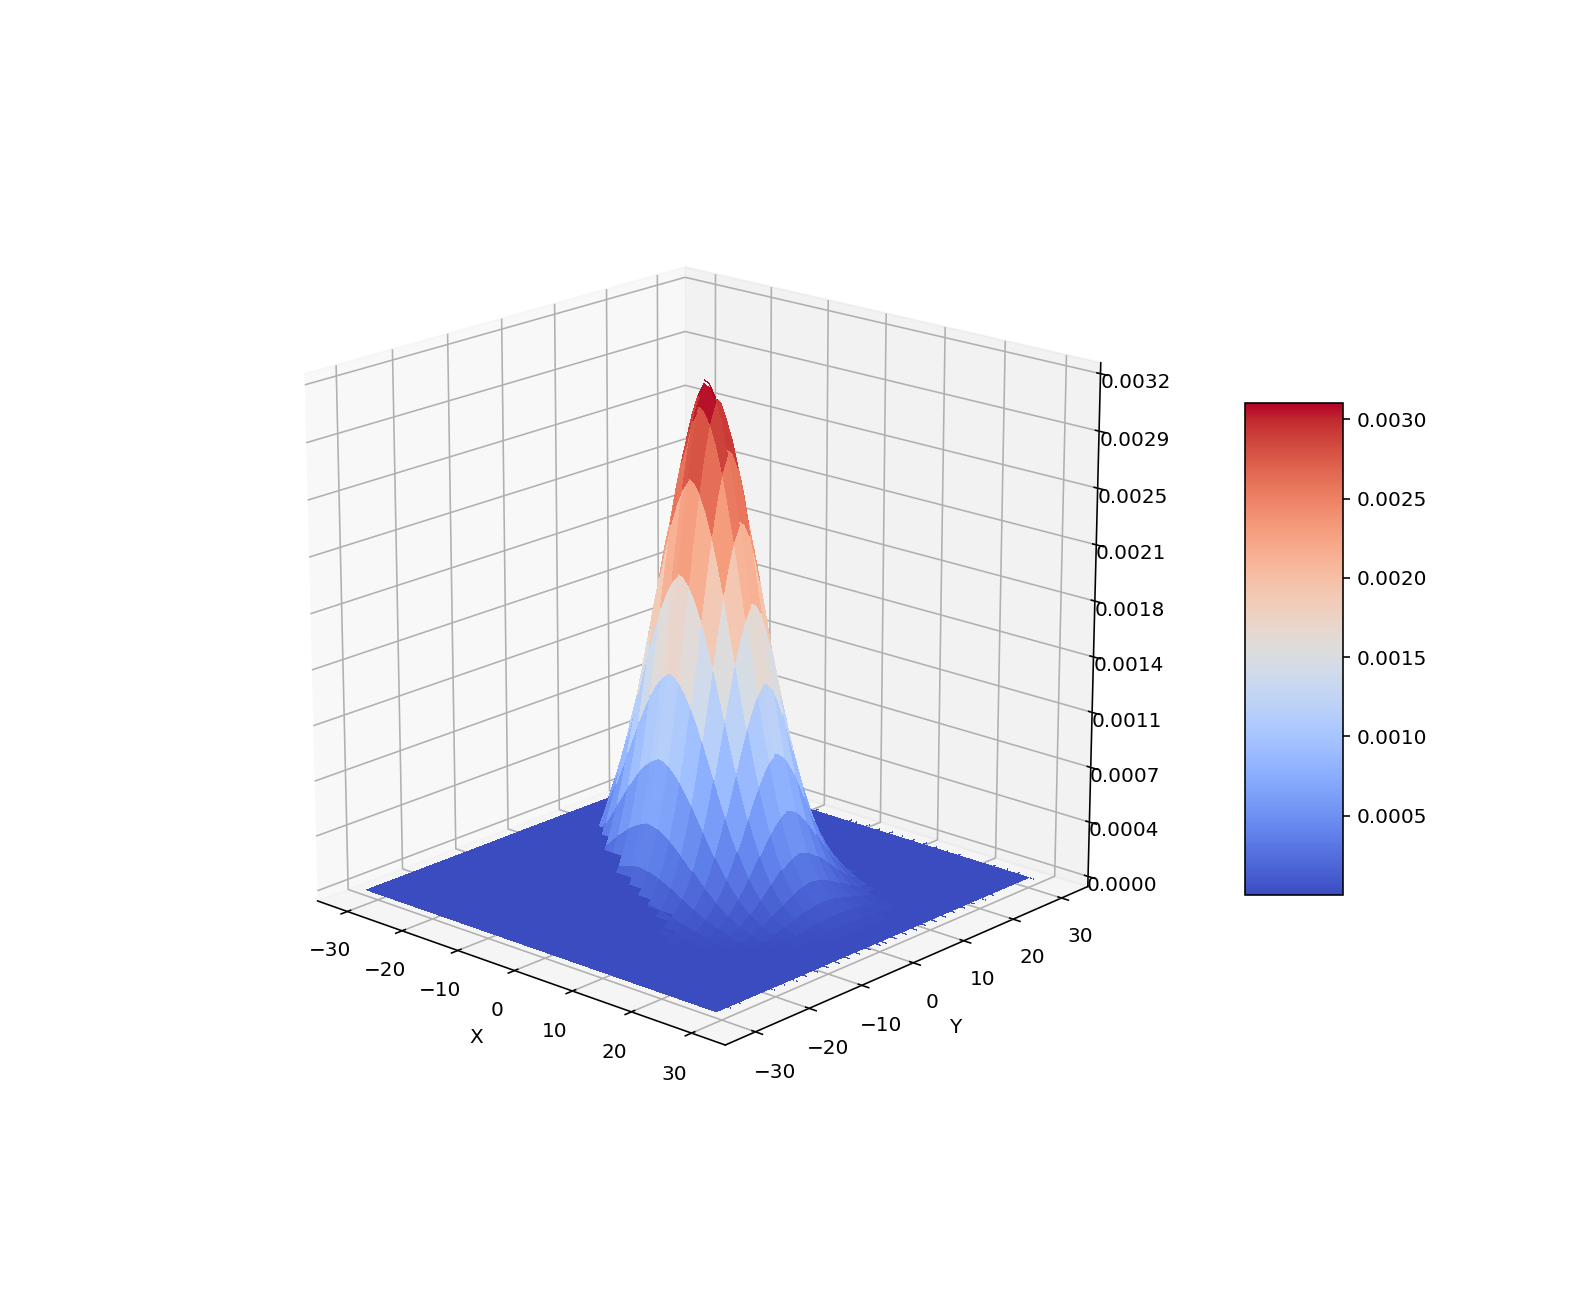

In [133]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.gca(projection='3d')

# Make data.
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
#X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
X = np.concatenate((np.arange(0,32), np.arange(-31,1)))
Y = np.concatenate((np.arange(0,32), np.arange(-31,1)))
X, Y = np.meshgrid(X, Y)
#Z = np.absolute(df.values)
Z = np.real(df.values)
#Z = np.imag(df.values)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z.min(), Z.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.04f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()